In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import interact widget from ipywidgets
from ipywidgets import interact

## Building the network

In [2]:
# defining the derivative of the membrane potential
def dhdt(h, I, tau, R):
    return (R * I - h) / tau
# defining the transfer function
def transfer(h, alpha, beta):
    return (1/(1 + np.exp(-2 * alpha * (h - beta))))

In [3]:
def interactive_activation(alpha=.2, beta=.5):
    h_list = np.linspace(-10, 10, 1000)
    activation_list = transfer(h_list, alpha=alpha, beta=beta)

    plt.plot(h_list, activation_list, label='transfer function')
    plt.xlabel('h')
    plt.ylabel('transfer function')
    plt.legend()
    plt.show()

_ = interact(interactive_activation, alpha=(0.1, 2, 0.1), beta=(0.1, 2, 0.1))

interactive(children=(FloatSlider(value=0.2, description='alpha', max=2.0, min=0.1), FloatSlider(value=0.5, de…

## 0.1. Plot the transfer function g as a function of the potential h. How do α and β affect the shape?
- $\alpha$ is changing the slope of the transfer function, the higher the value the steeper the slope.
- $\beta$ is shifting the transfer function. The higher the value the more shifted to the right.



In [20]:
T = 100 # ms
dt = .1 # ms
tau = 10 # ms
R = 1 # Ohm # needs to be asked on the units
r0 = 1 # mHz
alpha = .2 # mV^-1
beta = .5 # mV

N = 10 # number of neurons
h = np.zeros((N, int(T/dt)))
t = np.linspace(0, T, int(T/dt))
I0 = 2 # A
omega = .1 # Hz
# I = np.zeros((N, int(T/dt))) # input current
# I_noisy = np.random.normal(0, 1, (N, int(T/dt)))
I = I0 * np.sin(omega * np.linspace(0, T, int(T/dt)))
# repeating the input current for all neurons
I = np.tile(I, (N, 1))
# I[:,:] = I0 * np.sin(omega * t)
rate = np.zeros((N, int(T/dt)))
spikes = np.zeros((N, int(T/dt)))

Text(0, 0.5, 'Current (A)')

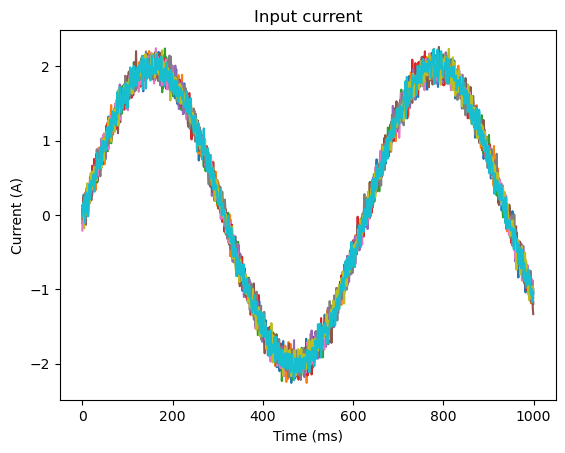

In [21]:
plt.plot(I.T + np.random.normal(0, .1, I.shape).T);
plt.title('Input current')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')

In [22]:
I.shape

(10, 1000)

In [29]:
for t in range(1, int(T/dt)):
    h[:, t] = h[:, t-1] + dt * dhdt(h[:, t-1], I[:, t-1], tau, R)
    rate[:, t] = r0 * transfer(h[:, t], alpha, beta)
    spikes[:, t] = np.random.poisson(rate[:, t] * dt) > 0
    

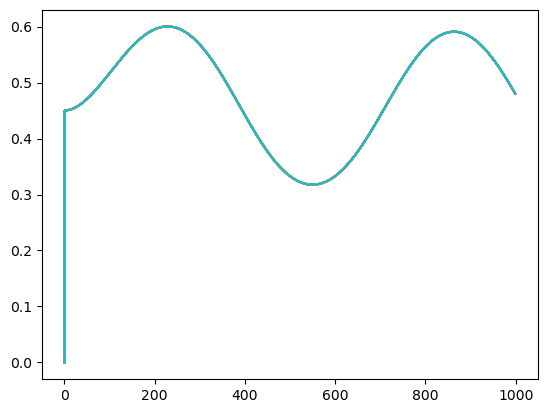

In [30]:
# plotting the rate of the neurons
for n in range(N):
    plt.plot(rate[n, :])

Text(0.5, 1.0, 'Spike raster')

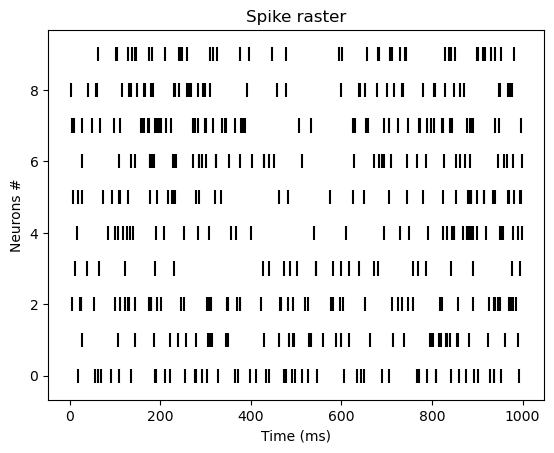

In [31]:
# plotting the spike raster
for n in range(N):
    spikes_n = np.where(spikes[n, :])[0]
    plt.vlines(spikes_n, n-.2, n+.2, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Neurons #')
plt.title('Spike raster')